 # DATA SCIENCE PROJECT- 
 ## *Investigating Crime in Chicago*
### GROUP C (Tuesday:1pm-3pm)


* <span style="color:blue"> ***Canh Thanh Nguyen (45551936)*** </span>
* <span style="color:orange"> ***Jarred Reilly (43264204)*** </span>
* <span style="color:green"> ***Soham Sarfare (45812748)*** </span>
* <span style="color:red"> ***Sukhmani Arora (45574715)*** </span>



### The main interest of topics below are :
- Find out number of crimes per community
- Correlate number of crimes to the economic factors. 
- Perform regression analysis linking economic factors to number of crimes or crime rate if we can get pop data
- Based on location (latitude,longitude) find which crime is most likely in that area using logistic regression. 
- Try to do a time series analysis on the data: Try to fit ARIMA model with respect to number of crimes and time of year and/or area.

Predict crime type based on location, date, time, beat whether it is domestic or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import statsmodels.tsa.statespace.sarimax as sms
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from itertools import product
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/Chicago_Merged.csv')
factors = pd.read_csv('data/Chicago_Socioeconomic_Indicators.csv')
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Police Districts,Police Beats,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,0,10778514.0,HZ544820,2016-12-08 17:23:00,079XX S MAY ST,0820,THEFT,$500 AND UNDER,APARTMENT,False,...,20.0,230.0,Auburn Gresham,4.0,27.6,28.3,18.5,41.9,15528.0,74.0
1,1,11411914.0,JB390837,2018-08-12 22:00:00,013XX W 76TH ST,0560,ASSAULT,SIMPLE,APARTMENT,False,...,20.0,230.0,Auburn Gresham,4.0,27.6,28.3,18.5,41.9,15528.0,74.0
2,2,11510038.0,JB519570,2018-11-17 14:49:00,079XX S BISHOP ST,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,STREET,False,...,20.0,230.0,Auburn Gresham,4.0,27.6,28.3,18.5,41.9,15528.0,74.0
3,3,11495832.0,JB500163,2018-11-02 08:20:00,083XX S HALSTED ST,0484,BATTERY,PRO EMP HANDS NO/MIN INJURY,STREET,False,...,20.0,236.0,Auburn Gresham,4.0,27.6,28.3,18.5,41.9,15528.0,74.0
4,4,11501552.0,JB508324,2018-11-08 11:00:00,087XX S RACINE AVE,0810,THEFT,OVER $500,SIDEWALK,False,...,9.0,244.0,Auburn Gresham,4.0,27.6,28.3,18.5,41.9,15528.0,74.0


In [3]:
no_of_crimes = df[['Community Area','COMMUNITY AREA NAME']]
no_of_crimes = no_of_crimes.set_index('Community Area').sort_index().dropna()
no_of_crimes = no_of_crimes.drop_duplicates()

count = 0
crimes = []
for val in no_of_crimes['COMMUNITY AREA NAME']:
    for entry in df['COMMUNITY AREA NAME']:
        if(entry == val):
            count = count + 1
    crimes.append(count)
    
no_of_crimes['Crimes'] = crimes
no_of_crimes.tail()

,COMMUNITY AREA NAME,Crimes
Community Area,,
74.0,Mount Greenwood,24079
75.0,Morgan Park,24255
76.0,O'Hare,24412
77.0,Edgewater,24643
NaN,CHICAGO,24644


In [4]:
factors = factors.set_index('Community Area Number')
no_of_crimes = no_of_crimes.join(factors, how='outer', on='Community Area',lsuffix='_caller').dropna()
no_of_crimes.head()

,COMMUNITY AREA NAME_caller,Crimes,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
Community Area,,,,,,,,,,
1.0,Rogers Park,351,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,681,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,996,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,1165,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,1281,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [82]:
no_of_crimes.tail

<bound method NDFrame.tail of                COMMUNITY AREA NAME_caller  Crimes     COMMUNITY AREA NAME  \
Community Area                                                              
1.0                           Rogers Park     351             Rogers Park   
2.0                            West Ridge     681              West Ridge   
3.0                                Uptown     996                  Uptown   
4.0                        Lincoln Square    1165          Lincoln Square   
5.0                          North Center    1281            North Center   
6.0                             Lake View    1860               Lake View   
7.0                          Lincoln Park    2315            Lincoln Park   
8.0                       Near North Side    3360         Near North Side   
9.0                           Edison Park    3381             Edison Park   
10.0                         Norwood Park    3496            Norwood Park   
11.0                       Jefferson Park    3

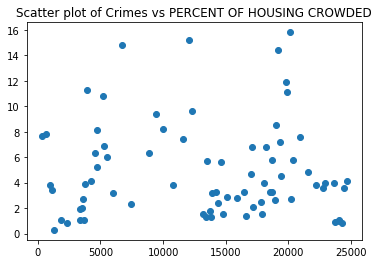

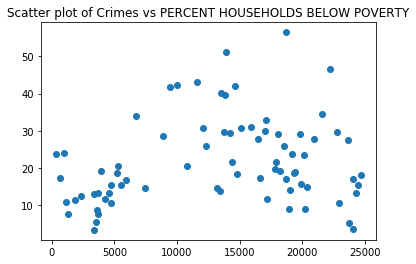

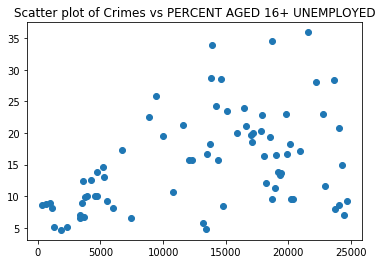

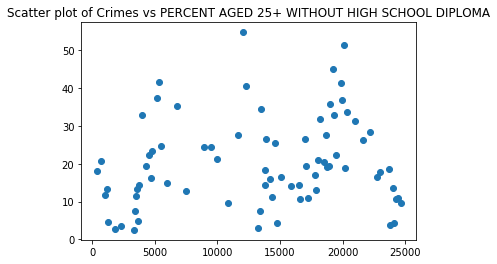

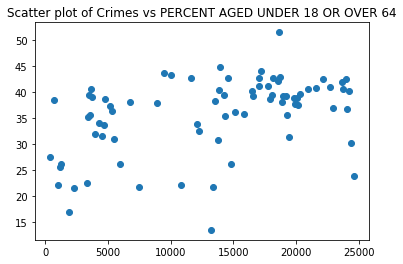

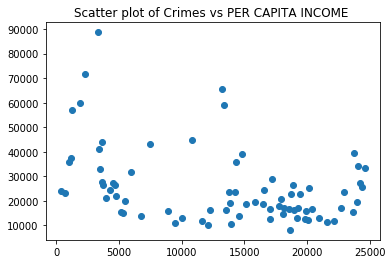

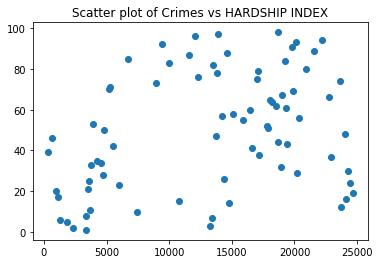

In [6]:
#fig, axs = plt.subplots((3,2))
for col in no_of_crimes.columns[3:]:
        plt.scatter(no_of_crimes['Crimes'],no_of_crimes[col])
        plt.title("Scatter plot of Crimes vs {}".format(col))
        plt.show()%%time
sns.pairplot(no_of_crimes)



**The above pairplot indicated that there is not much correlation between features so fitting the model may not be possible.**

### **Next, we try to calculate the r2 scores of training and test data respectively, the data is splitted into train and test sets and scores of predicted and actual values are plotted for following models:**
- Linear Regression,Support Vector, Neural network and Random Forest Regressor

In [6]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metric

train,test = train_test_split(no_of_crimes,test_size=0.1, random_state=1)
train = train.dropna()
test = test.dropna()

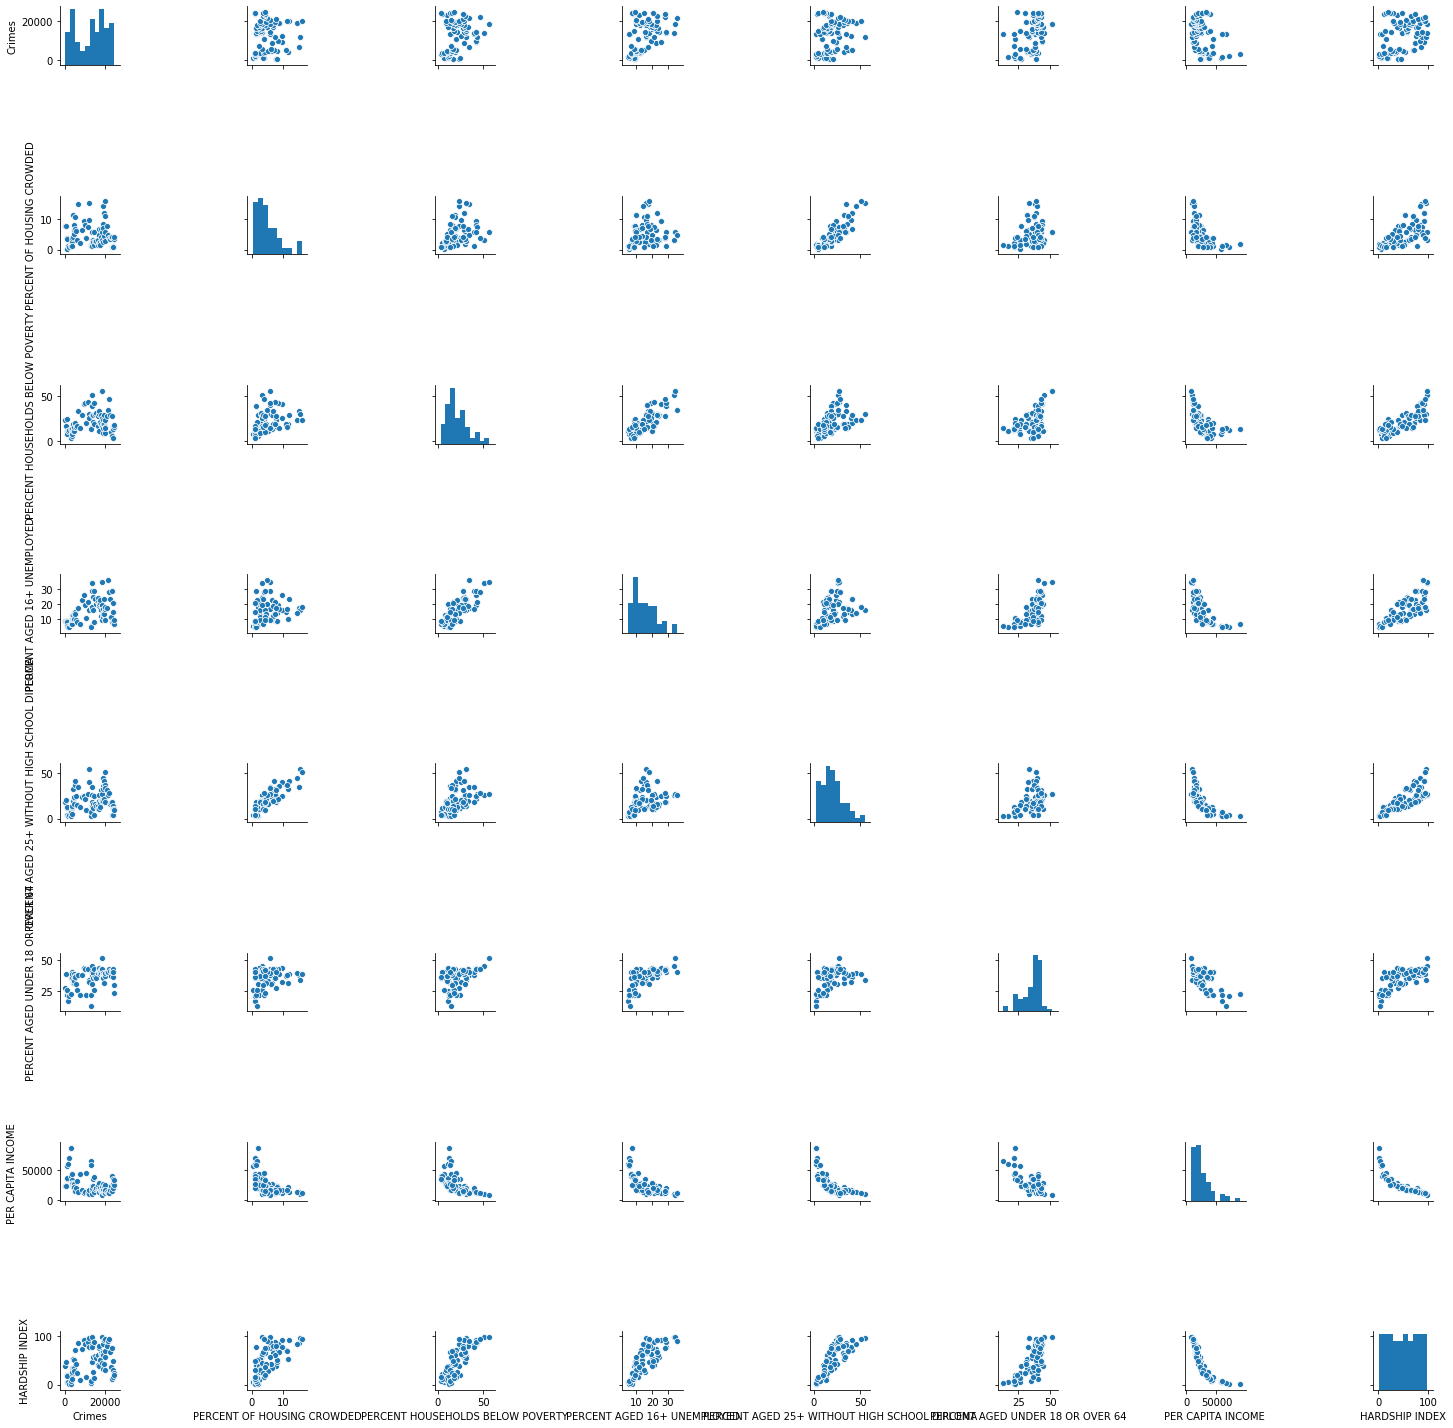

In [32]:
sns.pairplot(no_of_crimes)
plt.savefig("sample.png")
# Say that graphs show little correlation so fitting model may not be possible

In [27]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metric

X_train,X_test,y_train,y_test = train_test_split(no_of_crimes.iloc[:,3:].values,
                                                 no_of_crimes.Crimes.values,test_size=0.2, random_state=1)

R2 score on training data:  0.37021429305256914
R2 score on testing data:  -0.26749101640892525


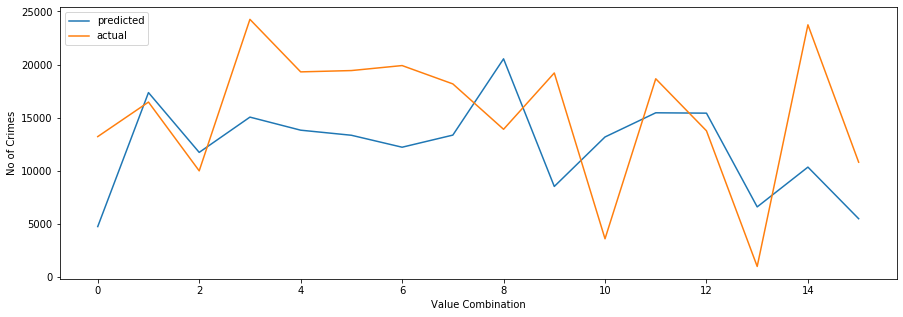

In [83]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_train)
print("R2 score on training data: ",metric.r2_score(y_train,y_pred))

y_pred = regressor.predict(X_test)
print("R2 score on testing data: ",metric.r2_score(y_test,y_pred))

plt.figure(figsize=(15,5))
plt.plot(y_pred, label='predicted')
plt.plot(y_test, label='actual')
plt.xlabel("Value Combination")
plt.ylabel("No of Crimes")
plt.legend()
plt.savefig("plot/Linear.png")

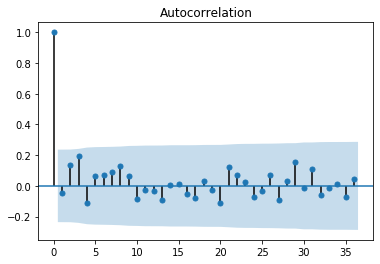

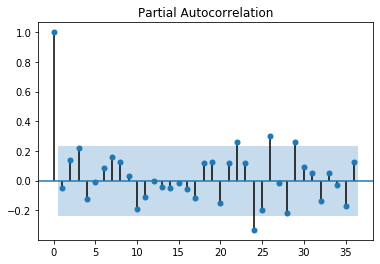

In [23]:
def plot_residuals(regressor):
    y_pred = regressor.predict(X_train)
    residuals = y_train - y_pred

    plot_acf(residuals,lags=36)
    plot_pacf(residuals,lags=36)
plot_residuals(regressor)

R2 score on training data:  -0.039037380426251156
R2 score on testing data:  -0.031102199603797454


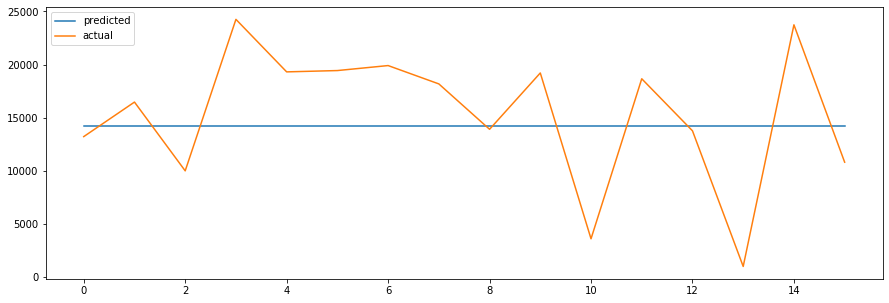

In [34]:
from sklearn.svm import SVR

regressor = SVR()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

y_pred = regressor.predict(X_train)
print("R2 score on training data: ",metric.r2_score(y_train,y_pred))

y_pred = regressor.predict(X_test)
print("R2 score on testing data: ",metric.r2_score(y_test,y_pred))

plt.figure(figsize=(15,5))
plt.plot(y_pred, label='predicted')
plt.plot(y_test, label='actual')
plt.legend()


In [ ]:
plot_residuals(regressor)

R2 score on training data:  0.10890640305196053
R2 score on testing data:  -0.2644688434351623


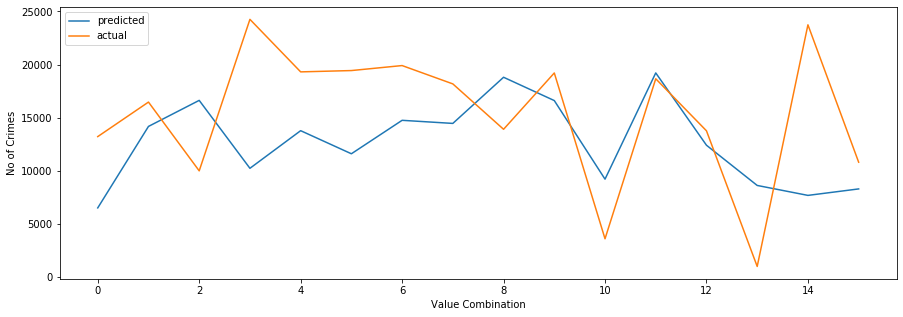

In [87]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(solver='lbfgs',random_state=0)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_train)
print("R2 score on training data: ",metric.r2_score(y_train,y_pred))

y_pred = regressor.predict(X_test)
print("R2 score on testing data: ",metric.r2_score(y_test,y_pred))

plt.figure(figsize=(15,5))
plt.plot(y_pred, label='predicted')
plt.plot(y_test, label='actual')
plt.xlabel("Value Combination")
plt.ylabel("No of Crimes")
plt.legend()
plt.savefig("plot/MLP.png")

In [ ]:
plot_residuals(regressor)

R2 score on training data:  0.8891930735227713
R2 score on testing data:  -0.6109940358874058


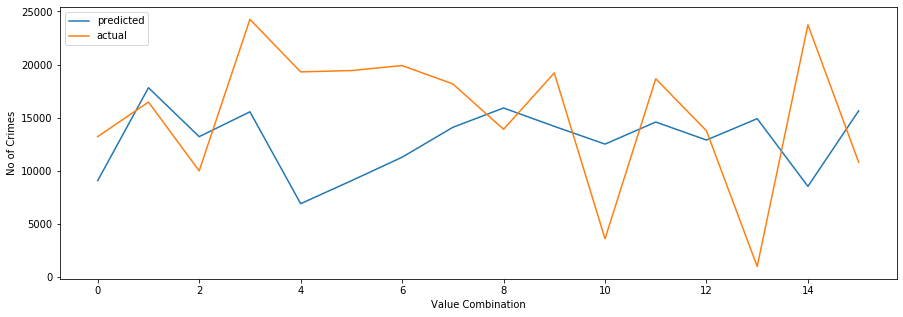

In [86]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100,criterion='mse',random_state=0)
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_train)
print("R2 score on training data: ",metric.r2_score(y_train,y_pred))

y_pred = regressor.predict(X_test)
print("R2 score on testing data: ",metric.r2_score(y_test,y_pred))

plt.figure(figsize=(15,5))
plt.plot(y_pred, label='predicted')
plt.plot(y_test, label='actual')
plt.xlabel("Value Combination")
plt.ylabel("No of Crimes")
plt.legend()
plt.savefig("plot/Random.png")

### After looking at the scores and plots of data using the above models, we see that none of the model fits well and as features are not correlated in a satisfactory way, these model fail. Hence, we proceed with ARIMA model and analyse it thoroughly.


## <span style="color:blue"> **ARIMA(AUTO REGRESSIVE - MOVING AVERAGE)** </span>

**In this data , ARIMA model is used to forecast the future number of crimes that is- we will analyse the number of crimes that will happen next year with the previous year's set of data.**

An ARIMA model uses the correlations in the data to suggest a model expressing future observations in terms of the past observations.

**ARIMA Method:**
1. Check to see if the data looks like it comes from a stationary process (stationary time series) and, if necessary, transform the data so that the transformed data looks like it comes from a stationary process.
**Stationarity:**
The ARIMA approach assumes that the data come from a stationary process. i.e. that the data are independent of time, in the long term. The data can be variable (or highly variable) - but the time series plot (sequence chart) of the data-
***fluctuate around a constant mean,***
***the variance of that fluctuation is also constant over time.***

2. Use the pattern in the ACF and PACF of the data to suggest a possible forecasting model.
**Auto-correlation coefficient:** Any pattern can be represented by looking at the how the observations are correlated with each other - will usually need to consider those correlations. **Partial auto-correlation** at lag k is the additional auto-correlation at lag k that is not explained by the earlier lags of 1, 2, 3, … (k-1) etc. Obviously, the auto-correlation and partial autocorrelation at lag 1 are the same.
3. Determine that forecasting model and obtain the residuals of that model.
4. Check the ACF and PACF of the residuals to determine if there is any pattern (i.e.information) left. Use that pattern to suggest a better model.
5. Repeat the process until the residuals can be considered independent error terms.
6. Use the optimum model for prediction.

In [ ]:
plot_residuals(regressor)

In [89]:
# starting data prep for ARIMA
df.Date = pd.to_datetime(df.Date)
df = df.sort_values(by='Date')
df = df.dropna()
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Police Districts,Police Beats,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
4427,4427,9911163.0,HY100031,2015-01-01 00:01:00,013XX S LAWNDALE AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,OTHER,True,...,21.0,155.0,North Lawndale,7.4,43.1,21.2,27.6,42.7,12034.0,87.0
14232,14232,10331355.0,HY521988,2015-01-01 00:01:00,018XX W 47TH ST,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,...,23.0,119.0,New City,11.9,29.0,23.0,41.5,38.9,12765.0,91.0
7612,7612,9913679.0,HY102670,2015-01-01 00:48:00,013XX N LAKE SHORE DR,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,...,14.0,197.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669.0,1.0
150,150,9911231.0,HY100112,2015-01-01 01:00:00,077XX S MAY ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,...,20.0,230.0,Auburn Gresham,4.0,27.6,28.3,18.5,41.9,15528.0,74.0
8960,8960,9913659.0,HY102042,2015-01-01 01:30:00,019XX S RACINE AVE,0820,THEFT,$500 AND UNDER,STREET,False,...,15.0,158.0,Lower West Side,9.6,25.8,15.8,40.7,32.6,16444.0,76.0


In [90]:
# Counting crimes per month
timely = pd.DataFrame()
years = [i for i in range(2015,2020)]
months = [i for i in range(1,13)]
days = [i for i in range(1,32)]

year = []
month = []
day = []
count = 0

def counting(m, y):
    flag = True;
    i = 0;
    counts = 0
    while(flag):
        if(df.iloc[i].Date.month == m and df.iloc[i].Date.year == y):
            counts = counts + 1
            i = i + 1
        else:
            flag = False
    return count

for y in years:
    for m in months:
        for i in range(0,df.shape[0]):
            if(df.iloc[i].Date.month == m and df.iloc[i].Date.year == y):
                count = count + 1
            #count = counting(i,y)
        timely = timely.append(pd.DataFrame(np.array([[y,m,count,'{}-{}-1'.format(y,m)]]), 
                                            columns=['year','month','crime','time']))
        count = 0
        
timely.crime = pd.to_numeric(timely.crime)
timely.index = timely.time
timely.index = pd.to_datetime(timely.index)
timely = timely.loc[:'2019-07-01']
timely.head()

,year,month,crime,time
time,,,,
2015-01-01,2015,1,433,2015-1-1
2015-02-01,2015,2,320,2015-2-1
2015-03-01,2015,3,439,2015-3-1
2015-04-01,2015,4,411,2015-4-1
2015-05-01,2015,5,462,2015-5-1


##### Now comes the concept of seasonal ARIMA . When the data is seasonal as in our case it is monthly data ,we try to fit an ARIMA model to our monthly data and determine the rate of crime.

**Creating the sequence charts with:**
- First order difference
- First order seasonal difference
- First order non-seasonal difference

*<span style="color:blue"> ***If the series has a trend over time we can often remove that trend by differencing and working out a forecasting model on the differences.*** </span>

**SEASONAL ARIMA**
If data appeared to come from a stationary process but that there was a strong seasonal effect.
A model is needed that incorporates:
- the immediate history and
- the seasonal history.
- Two separate ARIMA terms need to be defined :***an ARIMA on the non-seasonal data and an ARIMA on the seasonal data.***

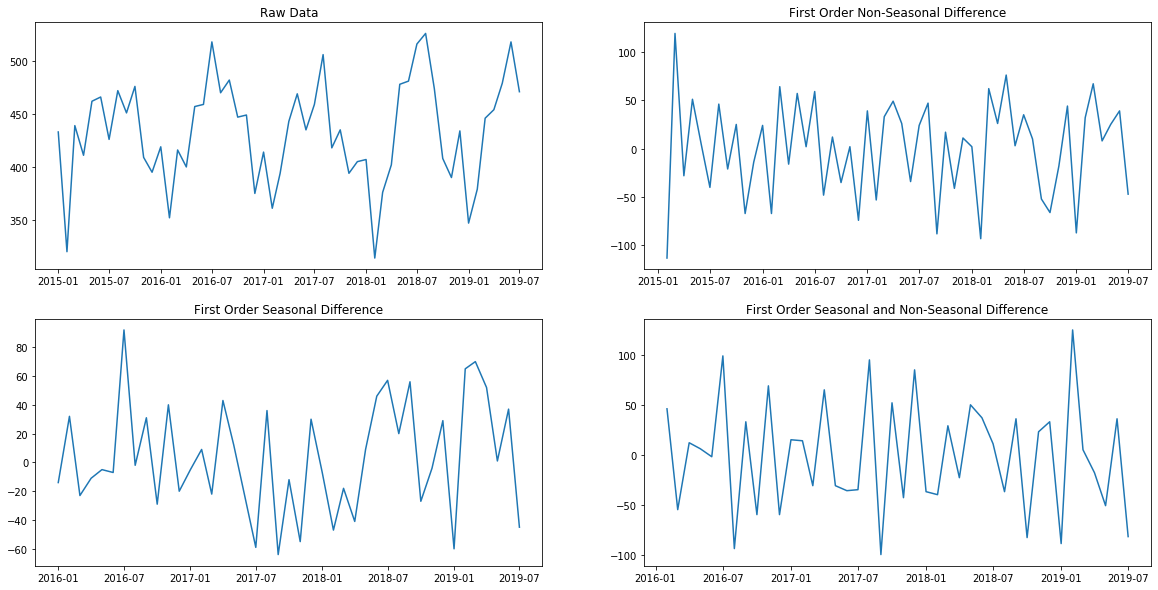

<Figure size 1440x720 with 0 Axes>

In [96]:
timely['first-order-diff'] = timely.crime - timely.crime.shift(1)
timely['first-order-seasonal-diff'] = timely.crime - timely.crime.shift(12)
timely['first-order-nonNseas-diff'] = timely['first-order-diff'] - timely['first-order-diff'].shift(12)

fig, axs = plt.subplots(2,2, figsize=(20,10))

plt.figure(figsize=(20,10))
axs[0][0].plot(timely.crime)
axs[0][0].set_title("Raw Data")


axs[0][1].plot(timely['first-order-diff'])
axs[0][1].set_title("First Order Non-Seasonal Difference")


axs[1][0].plot(timely['first-order-seasonal-diff'])
axs[1][0].set_title("First Order Seasonal Difference")

axs[1][1].plot(timely['first-order-nonNseas-diff'])
axs[1][1].set_title("First Order Seasonal and Non-Seasonal Difference")

fig.savefig("plot/Sequence Charts.png")

**The above sequence charts conclude that charts are not clear as they do not appear to come from a stationary process. This is because of lack of additional data. So, we move forward to analysis using Normalised BIC.**

### Normalized BIC:
Is a measure of the Likelihood of the Model. The Likelihood can always be improved by adding terms to the model. The Normalized BIC is the Likelihood with a penalty incorporated taking into account the number of parameters fitted. The more parameters fitted, the more the model is a product of your particular data-set. The aim is to explain as much of the variation in the data with as few parameters as possible. The value is not important, but is useful for comparing models. The model with the lower Normalized BIC is the better model.

### How to make decision on what AR or MA model to fit by looking at ACF and PACF plots?
- If a large number of lags of an MA are suggested as contributing to the model suggests a low order AR
- If a large number of lags of an AR are suggestedas contributing to the model suggests a low order MA
- Whatever model is selected, the number of parameters used should be as few as possible.
- A better fit can always be achieved by adding more parameters to the model,  and the more the model is a function of that particular data set.
- The fewer parameters that are used, the more likely the model will be universally useful.

**Classic Patterns**
- Case 1: Decreasing ACF, the first p lags of the PACF significant, then cut-off  AR(p) i.e. ARIMA(p, 0, 0)
- Case 2: Decreasing PACF, the first q lags of the ACF significant, then cut-off MA(q) i.e. ARIMA(0, 0, q)
- Case 3: The first q lags of the ACF significant, then cutoff,  the first p lags of the PACF significant, then cut-off, AR(p), MA(q) i.e. ARIMA(p, 0, q)

In [ ]:
plot_acf(timely['first-order-nonNseas-diff'].dropna(),lags=36)
plt.savefig('plot/acf 1.png')
plot_pacf(timely['first-order-nonNseas-diff'].dropna(),lags=36)
plt.savefig('plot/pacf 1.png')

# say that charts are not clear. It may be because of lack of additional data. Hence in next step we use a fucntion to determine
# best model based on BIC

In [101]:
import statsmodels.tsa.statespace.sarimax as sms
def optimiseSARIMA(endog,params,d,D,s):
    best_bic = float("inf")
    result = []
    for parameters in params:
        try:
            model = sms.SARIMAX(endog,order=(parameters[0],d,parameters[1]),
                                seasonal_order=(parameters[2],D,parameters[3],s)).fit(disp=0)
            #print(parameters[0])
            if model.bic < best_bic:
                best_bic = model.bic
                result = [parameters]
        except:
            continue
        
    return result

In [ ]:
p = [i for i in range(0,5)]
q = [i for i in range(0,5)]
d = [1]
D = [1]
s = [12]

endog = timely.crime
pramas = product(p,q,[0],[0])
params = list(pramas)
parameters = optimiseSARIMA(endog,params,d[0],D[0],s[0])
print("The best model with the lowest BIC is ARIMA({},{},{})({},{},{}) with periodicity as {}".format(parameters[0][0],
                                                                                                      d[0],
                                                                                                      parameters[0][1],
                                                                                                      parameters[0][2],
                                                                                                      D[0],
                                                                                                      parameters[0][3],
                                                                                                      s[0]))

### The best model with the lowest BIC is ARIMA(2,1,3)(0,0,0) with periodicity as 0. Hence, we proceed to fit this model.

In [ ]:
sarima = sms.SARIMAX(endog,order=(parameters[0][0],d[0],parameters[0][1]),
                     seasonal_order=(parameters[0][2],D[0],parameters[0][3],s[0])).fit(disp=0)
sarima.summary()

#### There are few lags that are not significant which primarily show that this model is not good and we have to remove few lags and try to fit another ARIMA model. Also, after looking at the graph of residuals below we see that it is not stationary hence, we try to add more data and further fit a seasonal ARIMA model.

In [ ]:
pred = sarima.predict()
forecast = sarima.predict(start=timely.shape[0],end=timely.shape[0]+12)
timely['modeled'] = sarima.fittedvalues
timely['modeled'][:1] = np.NaN
error = np.mean(np.abs((timely['crime'][1:] - timely['modeled'][1:])/timely['modeled'][1:])  * 100)

plt.figure(figsize=(20,10))
plt.plot(timely.crime, label='original')
plt.plot(pred[1:], label='modeled')
plt.plot(forecast, label='forecast')
plt.legend()
plt.title("Mean Absolute Error: {0:.2f}%".format(error))
plt.gcf().autofmt_xdate()

# Bad graph so we add more data and try to go for seasonal ARIMA

In [97]:
#Counting number of crimes per month x
time2 = pd.DataFrame()
years = [i for i in range(2011,2020)]
months = [i for i in range(1,13)]
days = [i for i in range(1,32)]

final = pd.read_csv("data/Chicago_Crimes_Processed_2011.csv")
final.Date = pd.to_datetime(final.Date)
year = []
month = []
day = []
count = 0
for y in years:
    for m in months:
        #for d in days:
        for i in range(0,final.shape[0]):
            if(final.iloc[i].Date.month == m and final.iloc[i].Date.year == y):
                count = count + 1
        time2 = time2.append(pd.DataFrame(np.array([[y,m,count,'{}-{}-1'.format(y,m)]]), columns=['year','month','crime','time']))
        count = 0
time2.crime = pd.to_numeric(time2.crime)
time2.index = time2.time
time2.index = pd.to_datetime(time2.index)
time2 = time2.loc[:'2019-07-01']
time2.head()

,year,month,crime,time
time,,,,
2011-01-01,2011,1,508,2011-1-1
2011-02-01,2011,2,406,2011-2-1
2011-03-01,2011,3,554,2011-3-1
2011-04-01,2011,4,560,2011-4-1
2011-05-01,2011,5,642,2011-5-1


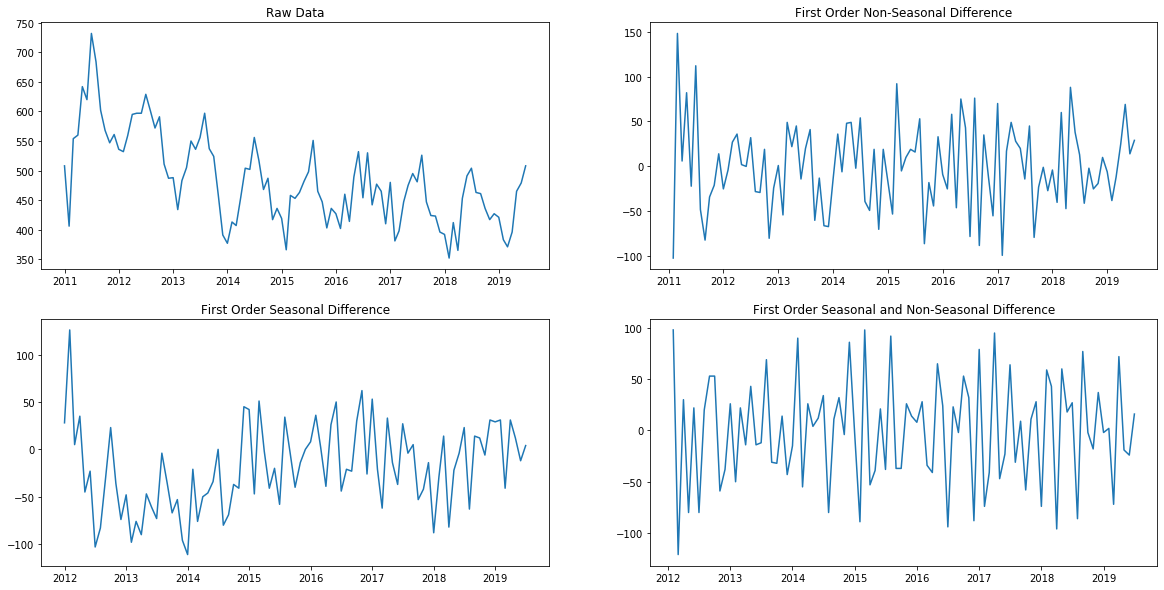

<Figure size 1440x720 with 0 Axes>

In [98]:
time2['first-order-diff'] = time2.crime - time2.crime.shift(1)
time2['first-order-seasonal-diff'] = time2.crime - time2.crime.shift(12)
time2['first-order-nonNseas-diff'] = time2['first-order-diff'] - time2['first-order-diff'].shift(12)

fig, axs = plt.subplots(2,2, figsize=(20,10))

plt.figure(figsize=(20,10))
axs[0][0].plot(time2.crime)
axs[0][0].set_title("Raw Data")


axs[0][1].plot(time2['first-order-diff'])
axs[0][1].set_title("First Order Non-Seasonal Difference")


axs[1][0].plot(time2['first-order-seasonal-diff'])
axs[1][0].set_title("First Order Seasonal Difference")

axs[1][1].plot(time2['first-order-nonNseas-diff'])
axs[1][1].set_title("First Order Seasonal and Non-Seasonal Difference")

fig.savefig("plot/Sequence Charts 2.png")

**The sequence  chart of first order seasonal and first order non-seasonal difference appears to come from a stationary process hence we use these transformation to display ACF and PACF plots. The number of lags used as 48 so as to see the seasonality in the data and determine the correct model. the lags in seasonal data are seen in a way that cut-off at 1st,12th,24th,36th,48th lag is seen and model is determined with correct AR/SAR,MA/SMA terms.**

****"SAR-SEASONAL AR, SMA-SEASONAL MA"****

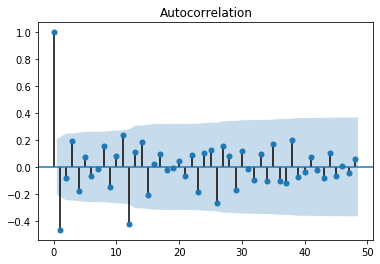

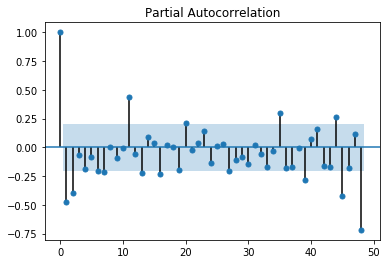

In [100]:
# using seasonal and non seasonal transformation
plot_acf(time2['first-order-nonNseas-diff'].dropna(),lags=48)
plt.savefig('plot/acf 1.png')
plot_pacf(time2['first-order-nonNseas-diff'].dropna(),lags=48)
plt.savefig('plot/pacf 1.png')

In [102]:
# finding best model 

p = [i for i in range(0,5)]
q = [i for i in range(0,5)]
P = [i for i in range(0,5)]
Q = [i for i in range(0,5)]
d = [1]
D = [1]
s = [12]
endog = time2.crime
pramas = product(p,q,P,Q)
params = list(pramas)

parameters = optimiseSARIMA(endog,params,d[0],D[0],s[0])
print("The best model with the lowest BIC is ARIMA({},{},{})({},{},{}) with periodicity as {}".format(parameters[0][0],
                                                                                                      d[0],
                                                                                                      parameters[0][1],
                                                                                                      parameters[0][2],
                                                                                                      D[0],
                                                                                                      parameters[0][3],
                                                                                                      s[0]))

The best model with the lowest BIC is ARIMA(0,1,1)(0,1,1) with periodicity as 12


**The best model with the lowest BIC is ARIMA(0,1,1)(0,1,1) with periodicity as 12.**

In [103]:
sarima = sms.SARIMAX(endog,order=(parameters[0][0],d[0],parameters[0][1]),
                     seasonal_order=(parameters[0][2],D[0],parameters[0][3],s[0])).fit(disp=0)
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              crime   No. Observations:                  103
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -449.854
Date:                            Mon, 04 Nov 2019   AIC                            905.709
Time:                                    11:15:48   BIC                            913.208
Sample:                                01-01-2011   HQIC                           908.733
                                     - 07-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7112      0.071    -10.036      0.000      -0.850      -0.572
ma.S.L12      -0.7166      0.146     -4.908      0.000      -1.003      -0.430
sigma2      1159.8674    184.693      6.280      0.000     797.876    1521.859
===================================================================================
Ljung-Box (Q):                       30.01   Jarque-Bera (JB):                 0.92
Prob(Q):                              0.87   Prob(JB):                         0.63
Heteroskedasticity (H):               0.43   Skew:                            -0.22
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

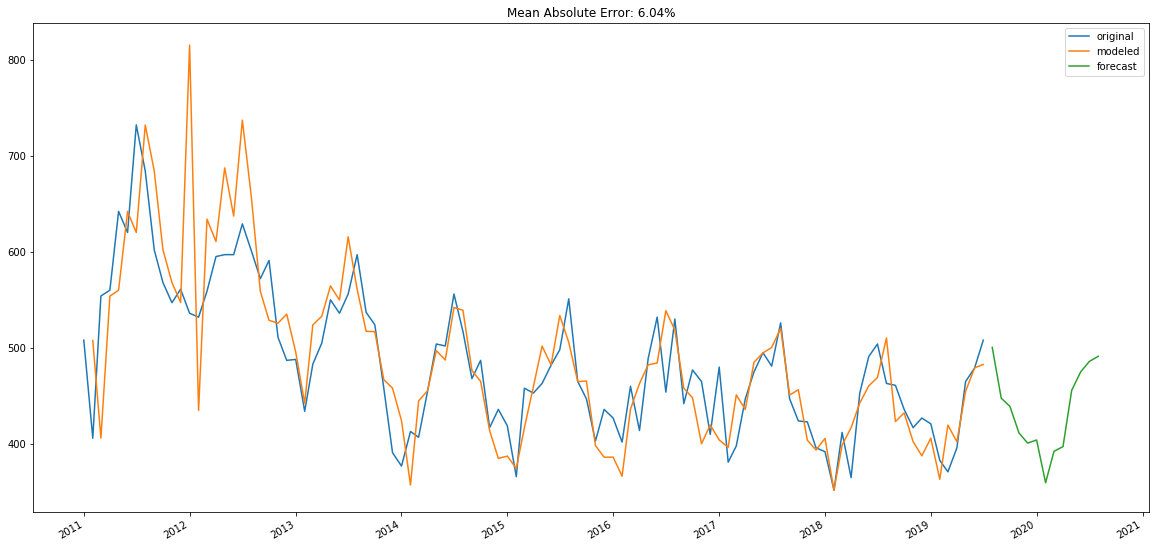

In [104]:
pred = sarima.predict()
forecast = sarima.predict(start=time2.shape[0],end=time2.shape[0]+12)
time2['modeled'] = sarima.fittedvalues
time2['modeled'][:12+1] = np.NaN
error = np.mean(np.abs((time2['crime'][12+1:] - time2['modeled'][12+1:])/time2['modeled'][12+1:])  * 100)

plt.figure(figsize=(20,10))
plt.plot(time2.crime, label='original')
plt.plot(pred[1:], label='modeled')
plt.plot(forecast, label='forecast')
plt.legend()
plt.title("Mean Absolute Error: {0:.2f}%".format(error))
plt.gcf().autofmt_xdate()
plt.savefig("plot/Forecasted Values.png")

### The above ARIMA model is the best fit and hence the forecasted value can be trusted. All the lags are significant (if they are not then we have to remove these lags from the model and try fitting another model).